<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Здорово, что все импорты находятся в одной ячейке.<br>
Если хочешь сделать ещё лучше, соблюдай стандарт PEP-8, разбей импорты на функциональные группы, раздели группы пустой строкой. Можно в каждой группе отсортировать импорты в алфавитном порядке.<br>
Ссылка для ознакомления: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html
</font>

## Подготовка данных

Подготовим данные к работе

In [2]:
data_train = pd.read_csv("/datasets/gold_recovery_train_new.csv")   
data_test = pd.read_csv("/datasets/gold_recovery_test_new.csv")
data_full = pd.read_csv("/datasets/gold_recovery_full_new.csv")

In [3]:
data_train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data_test.head(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
data_full.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [9]:
data_train.shape

(14149, 87)

In [10]:
data_test.shape

(5290, 53)

In [11]:
data_full.shape

(19439, 87)

Рассмотрев каждый из предоставленных датасетов мы видим, что в тестовом датасете отсутствует информация по финальным характеристикам продукта, а также характеристики, показывающие параметры продукта после каждого этапа производства. Из этого следует, что тестовые данные - данные о сырье, до начала его обработки или же во время, до получения результата.
Полная выборка - тренировочная + тестовая со всеми параметрами. Данные нуждаются в предобработке.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

Теперь на тренировочной выборке проверим правильность вычисления эффективности обогощения. Расчитаем эффективность расчетов для столбца rougher.output.recovery в тренировочной выборке. Для этого нам понадобиться доля золота до флотации, после флотации и в отвальных хвостах. Данные хранятся в столбцах rougher.input.feed_au, rougher.output.concentrate_au, rougher.output.tail_au соответсвенно. Расчитаем коэффициент и найдем MAE между расчетами и данными из таблицы.

In [12]:
def recovery(row):
    rec = (row["rougher.output.concentrate_au"] * (row["rougher.input.feed_au"] - row["rougher.output.tail_au"]))/(row["rougher.input.feed_au"] * (row["rougher.output.concentrate_au"] - row["rougher.output.tail_au"]))*100
    return rec

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Расчёт верный!</font>

In [13]:
data_train["rec_rougher"] = data_train.apply(recovery, axis = 1)

In [14]:
mean_absolute_error(data_train["rougher.output.recovery"], data_train["rec_rougher"])

9.73512347450521e-15

In [15]:
data_train = data_train.drop("rec_rougher", axis = 1)

Средняя абсолютная ошибка между расчитанным обогащением после флотации и в данных очень мала. Из этого следует, что расчеты данные для анализа заказчиком верны. Теперь необходимо произвести предобработку данных.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Проанализировав, данные в тренировочной и тестовой выборке имеют нулевые значения почти во всех столбцах. Считаю необходимым удалить строки в которых есть нулевые значения целевого признака, так как нужны точные значения для проверки предсказаний. пропуски в остальных признаках заменим на предыдущие значения, так как по условию задачи они часто схожи.

In [16]:
data_train = data_train.dropna(subset = ["rougher.output.recovery", "final.output.recovery"])
data_full = data_full.dropna(subset = ["rougher.output.recovery", "final.output.recovery"])
data_train = data_train.fillna(method = "ffill")
data_test = data_test.fillna(method = "ffill")
data_full = data_full.fillna(method = "ffill")

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Пропуски заполнены согласно условию задачи!</font>

Посмотрим есть ли в данных явные дубликаты

In [17]:
data_full.duplicated().sum()

0

В данных нет дубликатов. Так как дата не является признаком необходимым для расчетов целевого признака необходимо индексировать датасеты по дате, для лучшей идентификации строк.

In [18]:
data_train.index = data_train["date"]
data_train = data_train.drop("date", axis = 1)
data_test.index = data_test["date"]
data_test = data_test.drop("date", axis = 1)
data_full.index = data_full["date"]
data_full = data_full.drop("date", axis = 1)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно, лучше привязаться ко времени.</font> 

В данном разделе были просмотрены данные, предоставленные заказчиком, провдена проверка расчетов эффективности обогощения. Проанализированы отличия между тестовым и тренировочным датасетом, а также произведена подготовка данных к дальнейшей работе

Теперь необходимо проанализировать как меняется концентрация металлов на различных этапах очистки сырья. Всего сырье проходит 3 этапа очистки - флотацию, первую и второю очиску. Проведем анализ на основе данных из полного, неразделенного датасета.

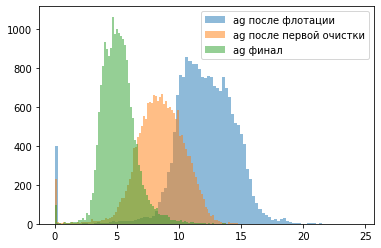

In [19]:
plt.hist(data_full["rougher.output.concentrate_ag"], alpha = 0.5, label = "ag после флотации", bins = 100)
plt.hist(data_full["primary_cleaner.output.concentrate_ag"], alpha = 0.5, label = "ag после первой очистки", bins = 100)
plt.hist(data_full["final.output.concentrate_ag"], alpha = 0.5, label = "ag финал", bins =100)
plt.legend() 

По графику распределения концентрации серебра в сырье видим, что без обработки в среднем процент серебра достигает 10, после флотации средний процент ag немного повышается. После первичной очиски концентрация падает в среднем до 8 процентов. В финальном продукте процент серебра в среднем достигает примерно 5 процентов. Но коненчно возможны оклонения, как в большую, так и в меньшую стороны. Рассмотрим распределения концентрации для pb.

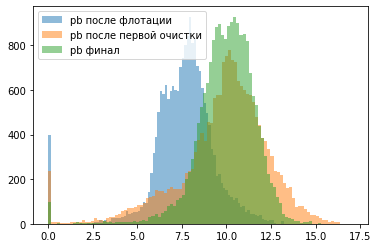

In [20]:
plt.hist(data_full["rougher.output.concentrate_pb"], alpha = 0.5, label = "pb после флотации", bins = 100)
plt.hist(data_full["primary_cleaner.output.concentrate_pb"], alpha = 0.5, label = "pb после первой очистки", bins = 100)
plt.hist(data_full["final.output.concentrate_pb"], alpha = 0.5, label = "pb финал", bins =100)
plt.legend() 

После флотации распределение свинца в среднем показывает результат 7.5 процента. При первой и второй очистке распределение свинца показывает в среднем окло 10 процентов, но при первой очиске распределение более широкое, при вторичном же более стремится к среднему. 

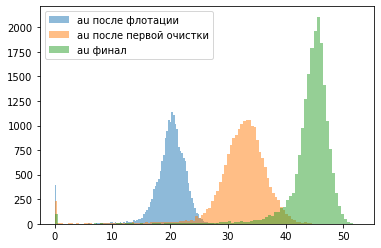

In [21]:
plt.hist(data_full["rougher.output.concentrate_au"], alpha = 0.5, label = "au после флотации", bins = 100)
plt.hist(data_full["primary_cleaner.output.concentrate_au"], alpha = 0.5, label = "au после первой очистки", bins = 100)
plt.hist(data_full["final.output.concentrate_au"], alpha = 0.5, label = "au финал", bins =100)
plt.legend() 

Для распределения золота в разных этапах явно видна зависимость. При каждом этапе процент золота в продукте увеличивается. При флотации в среднем процент равен примерно 20 процентам. После второй очистки средний процент золота примерно равняется 45 процентам. Также для каждого из металлов видны выбросы в нуле на каждом из этапов.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Всё верно!</font>

Далее расмотрим распределение гранул сырья на обучающей и тестовой выборках. Для этого необходимо сравнить распределения данных в столбцах primary_cleaner.input.feed_size и rougher.input.feed_size. 

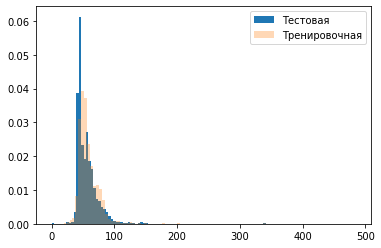

In [22]:
plt.hist(data_test["rougher.input.feed_size"], alpha = 1, bins = 100, label = "Тестовая", density=True)
plt.hist(data_train["rougher.input.feed_size"], alpha = 0.3, bins = 100, label = "Тренировочная", density=True)
plt.legend()

In [23]:
data_train["rougher.input.feed_size"].describe(), data_test["rougher.input.feed_size"].describe()

(count    14149.000000
 mean        60.239856
 std         23.005310
 min          9.659576
 25%         48.966751
 50%         55.269784
 75%         66.007526
 max        484.967466
 Name: rougher.input.feed_size, dtype: float64,
 count    5290.000000
 mean       55.952754
 std        19.080334
 min         0.046369
 25%        43.906504
 50%        50.846843
 75%        62.451165
 max       392.494040
 Name: rougher.input.feed_size, dtype: float64)

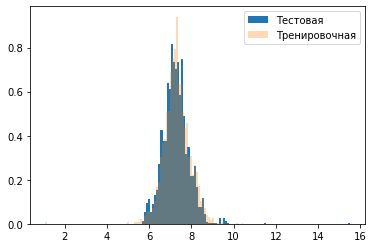

In [24]:
plt.hist(data_test["primary_cleaner.input.feed_size"], alpha = 1, bins = 100, label = "Тестовая", density=True)
plt.hist(data_train["primary_cleaner.input.feed_size"], alpha = 0.3, bins = 100, label = "Тренировочная", density=True)
plt.legend()

In [25]:
data_train["primary_cleaner.input.feed_size"].describe(), data_test["primary_cleaner.input.feed_size"].describe()

(count    14149.000000
 mean         7.322310
 std          0.614062
 min          1.080000
 25%          6.960000
 50%          7.290000
 75%          7.700000
 max         10.470000
 Name: primary_cleaner.input.feed_size, dtype: float64,
 count    5290.000000
 mean        7.266339
 std         0.610219
 min         5.650000
 25%         6.890000
 50%         7.250000
 75%         7.600000
 max        15.500000
 Name: primary_cleaner.input.feed_size, dtype: float64)

Распределения размеров гранул в в обучающей и тестовой выборке похожи. Среднее, стандартное отклонение, значение квартилей примерно схожи. Единственное, что минимальные и максимальные значения на тренировочной выборке более отдалены от среднего, и присутствуют более яркие выбросы. 

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Вывод верный!</font>

Тем рассмотрим суммарную крнцентрацию веществ на каждом этапе обработки. Для этого создадим столбцы с суммой всех концентраций элементов на всех этапах обработки и посмотрим на распределение. Рассматривать будем для датасета треин, так как в дальнейшем на нем будет обучаться модель, следовательно необходимо удалить аномальные значения в данных этой таблицы.

In [26]:
def sum_col_rougher(row):
    sum_con = row["rougher.output.concentrate_ag"]+row["rougher.output.concentrate_au"]+row["rougher.output.concentrate_pb"]+row["rougher.output.concentrate_sol"]
    return sum_con

In [27]:
data_train["rougher_sum_con"] = data_train.apply(sum_col_rougher, axis = 1)

(<AxesSubplot:>,
 count    14149.000000
 mean        67.173145
 std         12.713129
 min          0.000000
 25%         64.914390
 50%         69.175663
 75%         73.429261
 max         88.140119
 Name: rougher_sum_con, dtype: float64)

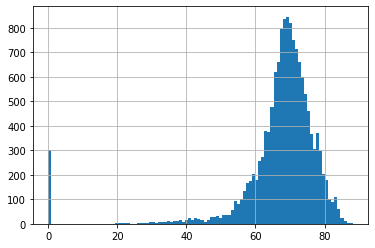

In [28]:
data_train["rougher_sum_con"].hist(bins=100), data_train["rougher_sum_con"].describe()

<AxesSubplot:>

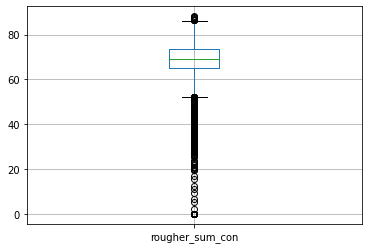

In [29]:
data_train.boxplot(column = "rougher_sum_con")

In [30]:
data_train["rougher_sum_con"].mean() - 3*data_train["rougher_sum_con"].std()

29.033758636871354

Суммарное распределение концентраций элементов после флотации скошено влево, среднее значение и медиана практически равны, это значит, что распределение не имеет больших выбросов. Но есть небольшие выбросы в сторону 0. Так минимальное значение в выборке равняется 0. Это явно аномальное значение. Так же по правилу трех сигм 99 процентов всего датасета находится в диапазоне больше 29. Считаю значения меньше - аномальными и удалю их.

In [31]:
data_train = data_train[data_train["rougher_sum_con"] > 29.04]

Рассмотрим распределение концентраций в сырье.

In [32]:
def sum_input(row):
    sum_con = row["rougher.input.feed_ag"]+row["rougher.input.feed_au"]+row["rougher.input.feed_pb"]+row["rougher.input.feed_sol"]
    return sum_con

In [33]:
data_train["primary_input"] = data_train.apply(sum_input, axis = 1)

(<AxesSubplot:>,
 count    13811.000000
 mean        56.286084
 std          6.756731
 min         11.784499
 25%         52.548974
 50%         56.622780
 75%         60.760588
 max         74.458253
 Name: primary_input, dtype: float64)

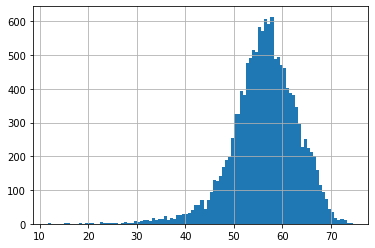

In [34]:
data_train["primary_input"].hist(bins=100), data_train["primary_input"].describe()

<AxesSubplot:>

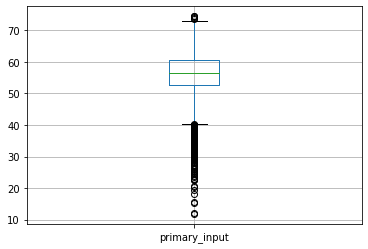

In [35]:
data_train.boxplot(column = "primary_input")

In [36]:
data_train["primary_input"].mean() - data_train["primary_input"].std() * 3

36.01589087306018

Распределение внешне похоже на предыдущие, опять же есть выбросы. Так же отсечем их по правилу 3 сигм.

In [37]:
data_train = data_train[data_train["primary_input"] > 36.6]

Рассмотрим распределение в финальном продукте.

In [38]:
def sum_col_final(row):
    sum_con = row["final.output.concentrate_ag"]+row["final.output.concentrate_au"]+row["final.output.concentrate_pb"]+row["final.output.concentrate_sol"]
    return sum_con

In [39]:
data_train["final_sum_con"] = data_train.apply(sum_col_final, axis = 1)

(<AxesSubplot:>,
 count    13638.000000
 mean        68.586913
 std          6.427722
 min          0.000000
 25%         67.593951
 50%         69.150928
 75%         70.966086
 max         80.210644
 Name: final_sum_con, dtype: float64)

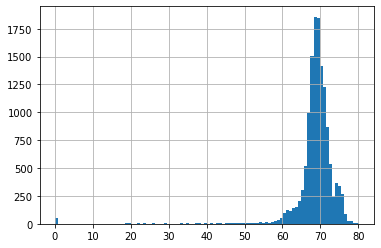

In [40]:
data_train["final_sum_con"].hist(bins = 100), data_train["final_sum_con"].describe()

<AxesSubplot:>

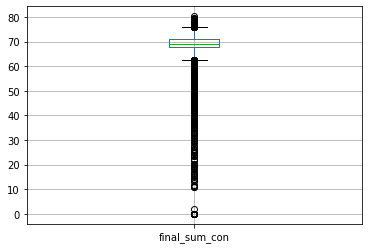

In [41]:
data_train.boxplot(column = "final_sum_con")

In [42]:
data_train["final_sum_con"].mean() - data_train["final_sum_con"].std()*3

49.30374681059258

Распределение также внешне очень похоже на предыдущие, но в этом 1 и 3 квартеле очень близки к медиане, также количество выбросов меньше, чем в предыдущих. Обрежем это распределение, также как и предыдущие - по правилу 3 сигм

In [43]:
data_train = data_train[data_train["final_sum_con"] > 49.1] 

Мной были исследованы распределения суммарной концентрации элементов в продукте на разных этапах, выявлены и удалены аномальные значения. Теперь данные полностью готовы к обучению моделей.

In [44]:
data_train = data_train.drop(["final_sum_con", "primary_input", "rougher_sum_con"], axis = 1)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Выбросы удалены.</font>

<font color='purple'><b>Провел исследование суммароной концентрации всех веществ в сырье в соответствии с заданием</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Отлично! </font>

## Модель

Теперь приступим к обучению моделей. Качество модели определяется метрикой sMAPE. Напишем функцию для расчета этой метрики.

In [45]:
def smape(targ, pred):
    smape = ((abs(targ-pred)/((abs(targ)+abs(pred))/2)).sum())*100/len(targ)
    return smape

In [46]:
def smape_full(smape_r, smape_final):
    s = 0.25 * smape_r + 0.75 * smape_final
    return s

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> `smape` и `smape_full` расчитаны верно.</font>

Сравним несколько моделей, точность предсказаний будем измерять метрикой smape. Для этого сделаем скорер, что бы считать выбирать модель по значению метрики smape.

In [47]:
smape_scorer = make_scorer(smape)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично, что оценка по целевой метрике!</font>

Теперь необходимо обучить и проверить модель. Для большей точности применим кросс-валидацию. Также необходимо выделить из тренировочной выборки целевые признаки. Обучать модель будем на признаках таких же как и в тестовой выборке, так как в тренировочной выборке есть фичи по которым на прямую можно посчитать таргетовые значения, поэтому удалим их.

In [48]:
train_target_r = data_train["rougher.output.recovery"]
train_target_final = data_train["final.output.recovery"]
train_features = data_train.drop(["rougher.output.recovery", "final.output.recovery"], axis = 1)

In [49]:
train_features = train_features.drop(["final.output.concentrate_ag", "final.output.concentrate_pb", "final.output.concentrate_sol", "final.output.concentrate_au",
                             "final.output.tail_ag", "final.output.tail_pb", "final.output.tail_sol", "final.output.tail_au",
                             "primary_cleaner.output.concentrate_ag", "primary_cleaner.output.concentrate_pb", "primary_cleaner.output.concentrate_sol",              
                             "primary_cleaner.output.concentrate_au", "rougher.output.tail_ag", "rougher.output.tail_pb", "rougher.output.tail_sol",                             
                             "rougher.output.tail_au", "secondary_cleaner.output.tail_ag", "secondary_cleaner.output.tail_pb", "secondary_cleaner.output.tail_sol",
                             "secondary_cleaner.output.tail_au", "primary_cleaner.output.tail_ag", "primary_cleaner.output.tail_pb", "primary_cleaner.output.tail_sol",
                             "primary_cleaner.output.tail_au","rougher.calculation.sulfate_to_au_concentrate", "rougher.calculation.floatbank10_sulfate_to_au_feed",
                              "rougher.calculation.floatbank11_sulfate_to_au_feed", "rougher.calculation.au_pb_ratio", "rougher.output.concentrate_ag", 
                              "rougher.output.concentrate_pb", "rougher.output.concentrate_au", "rougher.output.concentrate_sol"], axis = 1)

Обучим линейную регрессию

In [50]:
%%time

model = LinearRegression()
scorer_r = cross_val_score(model, train_features, train_target_r, scoring = smape_scorer).mean()
score_final = cross_val_score(model, train_features, train_target_final, scoring = smape_scorer).mean()
print(scorer_r, score_final)
print(smape_full(scorer_r, score_final))

7.012602852222335 10.64550199921868
9.737277212469595
CPU times: user 1.29 s, sys: 1.78 s, total: 3.07 s
Wall time: 3.02 s


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Кроссвалидация проведена верно!</font>

Линейная регрессия дает предикт с параметром smape равным 9.96, показатель неплохой, далее проведем обучение дерева решений. Выьерем с помощью GridSearchCV оптимальные параметры для данной выборки.

In [51]:
smape_grid = make_scorer(smape, greater_is_better = False)

In [52]:
%%time
parameter = {"max_depth": (1,100)}
model = DecisionTreeRegressor(random_state = 12345)
model_grid = GridSearchCV(model, parameter, scoring = smape_grid)
model_grid.fit(train_features, train_target_final)
model_grid.best_params_

CPU times: user 5.08 s, sys: 717 µs, total: 5.08 s
Wall time: 5.08 s


{'max_depth': 1}

<font color='purple'><b>Добавил scorer c параметром greater_is_better = False для GridSearchCV.</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Супер!</font>

Обучим дерево решений с оптимальными параметрами

In [53]:
model =  DecisionTreeRegressor(max_depth = 1, random_state = 12345)
scorer_r = cross_val_score(model, train_features, train_target_r, scoring = smape_scorer).mean()
score_final = cross_val_score(model, train_features, train_target_final, scoring = smape_scorer).mean()
print(scorer_r, score_final)
print(smape_full(scorer_r, score_final))

6.807803449725165 9.380809409113258
8.737557919266235


Дерево решений с глубиной дерева 100 дало лучший параметр smape, чем линйная регрессия. Рассмотрим модель случайного леса.

In [54]:
model = RandomForestRegressor(max_depth = 2, n_estimators = 100, random_state = 12345)
scorer_r = cross_val_score(model, train_features, train_target_r, scoring = smape_scorer).mean()
score_final = cross_val_score(model, train_features, train_target_final, scoring = smape_scorer).mean()
print(scorer_r, score_final)
print(smape_full(scorer_r, score_final))

6.514315104425904 8.862671924689119
8.275582719623316


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Рассмотрим модель соседей и сделаем выводы.

In [55]:
%%time
parameter = {"n_neighbors": (1,100)}
model = KNeighborsRegressor()
model_grid = GridSearchCV(model, parameter, scoring = smape_grid)
model_grid.fit(train_features, train_target_final)
model_grid.best_params_

CPU times: user 4.28 s, sys: 5.44 s, total: 9.73 s
Wall time: 9.73 s


{'n_neighbors': 100}

In [56]:
model = KNeighborsRegressor(n_neighbors = 1)
model.fit(train_features, train_target_final)
scorer_r = cross_val_score(model, train_features, train_target_r, scoring = smape_scorer).mean()
score_final = cross_val_score(model, train_features, train_target_final, scoring = smape_scorer).mean()
print(scorer_r, score_final)
print(smape_full(scorer_r, score_final))

9.981543394569691 15.319403084266014
13.984938161841933


Соседи показал самое плохое значение smape. Лучшее значение smape показал алгоритм случайного леса с оптимальными значениями, попробую проверить его на тестовой выборке. Для этого создадим датасет с таргетовыми значениями для тестового датасета. Подгрузим их из data_full.

In [57]:
targ = data_full[["rougher.output.recovery", "final.output.recovery"]]
data_test = data_test.join(targ, how = "left")

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Разделим тестовый датасет на features и target

In [58]:
test_target_r = data_test["rougher.output.recovery"]
test_target_final = data_test["final.output.recovery"]
test_features = data_test.drop(["rougher.output.recovery", "final.output.recovery"], axis = 1)

Обучим RandomForest и проверим предсказания на тестовом датасете.

In [59]:
model = RandomForestRegressor(max_depth = 2, n_estimators = 100, random_state = 12345)
model.fit(train_features, train_target_r)
prediction = model.predict(test_features)
smape_r = smape(test_target_r, prediction)
smape_r

8.323993376730762

In [60]:
model = RandomForestRegressor(max_depth = 2, n_estimators = 100, random_state = 12345)
model.fit(train_features, train_target_final)
prediction = model.predict(test_features)
smape_f = smape(test_target_final, prediction)
smape_f

9.25752581214958

In [61]:
smape_full(smape_r, smape_f)

9.024142703294876

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

Значение smape случайного леса на тестовой выборке равняется 9.04. Качество предсказания считаю хорошим.

Сравним получившиеся у модели smape cо значением метрики у DummyRegressor

In [62]:
model = DummyRegressor()
model.fit(train_features, train_target_r)
prediction = model.predict(test_features)
smape_r = smape(test_target_r, prediction)
smape_r

8.928685427261055

In [63]:
model = DummyRegressor()
model.fit(train_features, train_target_final)
prediction = model.predict(test_features)
smape_f = smape(test_target_final, prediction)
smape_f

9.977474365607026

In [64]:
smape_full(smape_r, smape_f)

9.715277131020533

<font color='purple'><b>DummyRegressor предсказывает на тестовой выборке со значением smape 9.8. Модель случайного леса с оптимальными гиперпараметрами показывает лучший результат smape, следовательно предсказания адекватны.</b></font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Вывод верный!</font>

В данном проекте предсказывалось обогощение сырье после флотации и на финальном продукте. Мной были обработаны данные от заказчика, проверена правильность расчетов обогощения в тестовой выборке. Далее мной был проведен анализ и на основе его были убраны все выбросы из тестового датасета. Далее были обучены и проверены с помощью кросс-валидации на тестовой выборке несколько моделей и выбрана лучшая для предсказания таргктовых значений. Далее лучшая модель - RandomForestRegressor c гиперпараметрами 100 деревьев и глубиной 2 предсказала значение на тестовой выборке и вычеслено значение smape равное 9.04. Знасенеи метрики считаю хорошим и таким образом считаю все задачи проекта полностью выполнеными.

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Михаил, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Приведи исследование суммарных концентраций всех веществ в соответствие заданием.</font></ul>
<ul><font color='red'>Передай аргумент greater_is_better = False в make_scorer для GridSeachCV</font></ul>
<ul><font color='red'>Добавь тест константной модели для оценки адекватности работы моделей.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='purple'><b>Спасибо за проверку, все замечания учтены, а недочеты исправлены!</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Михаил, проект принят! \
Все этапы пройдены. Все критичные рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке